In [1]:
import sys
sys.path.append('../../')
from helpers.window import window_input_output

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Import data

In [3]:
df = pd.read_csv('../../datasets/Organic.csv')
df.head()

,Date,Envi,Fuji,Gala
0,2015-01-04,3199,6917,8
1,2015-01-11,8856,15071,25
2,2015-01-18,5475,32539,42
3,2015-01-25,4271,8412,585
4,2015-02-01,4824,10710,104


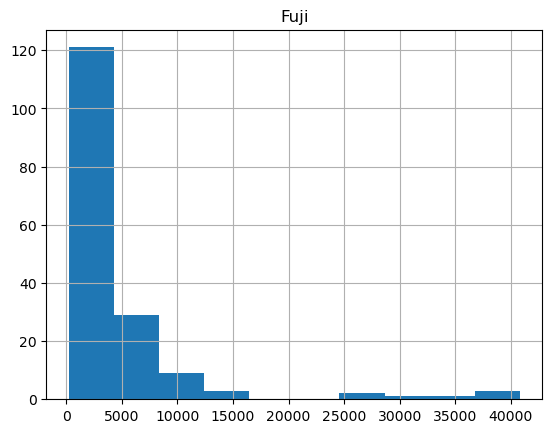

In [4]:
data = df[['Fuji']]
data.hist();

In [5]:
seq_df = window_input_output(14, 14, data)
seq_df

,Fuji,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,y_4,y_5,y_6,y_7,y_8,y_9,y_10,y_11,y_12,y_13
27,3067,3059.0,2930.0,2918.0,4349.0,4702.0,4800.0,5498.0,8930.0,8573.0,...,26156.0,11650.0,6082.0,7062.0,7175.0,10710.0,8412.0,32539.0,15071.0,6917.0
28,2605,3067.0,3059.0,2930.0,2918.0,4349.0,4702.0,4800.0,5498.0,8930.0,...,27507.0,26156.0,11650.0,6082.0,7062.0,7175.0,10710.0,8412.0,32539.0,15071.0
29,2620,2605.0,3067.0,3059.0,2930.0,2918.0,4349.0,4702.0,4800.0,5498.0,...,8035.0,27507.0,26156.0,11650.0,6082.0,7062.0,7175.0,10710.0,8412.0,32539.0
30,2963,2620.0,2605.0,3067.0,3059.0,2930.0,2918.0,4349.0,4702.0,4800.0,...,8344.0,8035.0,27507.0,26156.0,11650.0,6082.0,7062.0,7175.0,10710.0,8412.0
31,3931,2963.0,2620.0,2605.0,3067.0,3059.0,2930.0,2918.0,4349.0,4702.0,...,6633.0,8344.0,8035.0,27507.0,26156.0,11650.0,6082.0,7062.0,7175.0,10710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,751,598.0,639.0,497.0,551.0,687.0,839.0,939.0,483.0,528.0,...,907.0,1115.0,484.0,236.0,244.0,478.0,525.0,500.0,507.0,520.0
165,589,751.0,598.0,639.0,497.0,551.0,687.0,839.0,939.0,483.0,...,572.0,907.0,1115.0,484.0,236.0,244.0,478.0,525.0,500.0,507.0
166,640,589.0,751.0,598.0,639.0,497.0,551.0,687.0,839.0,939.0,...,412.0,572.0,907.0,1115.0,484.0,236.0,244.0,478.0,525.0,500.0
167,797,640.0,589.0,751.0,598.0,639.0,497.0,551.0,687.0,839.0,...,412.0,412.0,572.0,907.0,1115.0,484.0,236.0,244.0,478.0,525.0


# Split Data


In [6]:
X_cols = [col for col in seq_df.columns if col.startswith('x')]
X_cols.insert(0, 'Fuji')
y_cols = [col for col in seq_df.columns if col.startswith('y')]

X = seq_df[X_cols]
y = seq_df[y_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=123)

In [7]:
params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [3, 5, 7, 9, 11, 13],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'ccp_alpha': [0.1, 0.01, 0.001]
}

tree = DecisionTreeRegressor()

gs = GridSearchCV(estimator=tree, param_grid=params, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

model = gs.best_estimator_

y_pred = model.predict(X_test)

# Score

In [8]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Fuji):", mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (Fuji):", mae)

print("R-squared (Test score)", model.score(X_test, y_test))
print("Train score", model.score(X_train, y_train))

Mean Squared Error (Fuji): 7039347.00862069
Mean Absolute Error (Fuji): 2144.4137931034484
R-squared (Test score) -1.1876062870428201
Train score -0.057026043536751794


# Visualization

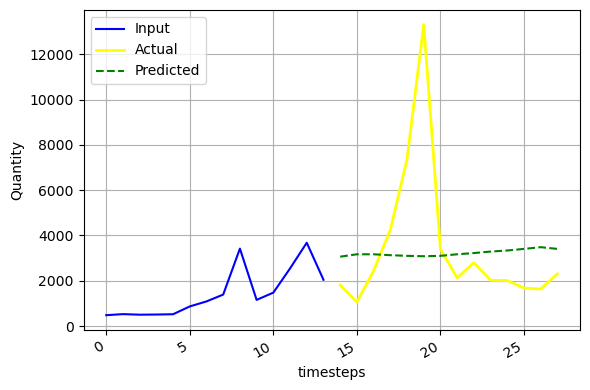

In [9]:
X_test_array = X_test.to_numpy()
y_test_array = y_test.to_numpy()

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(np.arange(0, 14, 1), X_test_array[1], 'b-', label='Input')
ax.plot(np.arange(14, 28, 1), y_test_array[1], color='yellow', label='Actual', linewidth=2)
ax.plot(np.arange(14, 28, 1), y_pred[1], color='green', label='Predicted', linestyle='--')

ax.set_xlabel('timesteps')
ax.set_ylabel('Quantity')
plt.grid(True)
plt.legend(loc=2)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

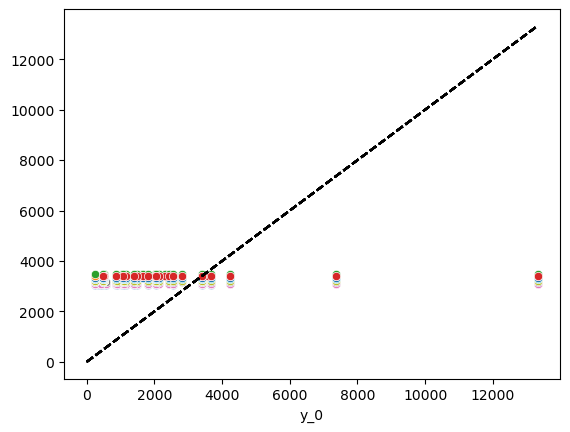

In [10]:
for i, col in enumerate(y_test.columns):
    sns.scatterplot(x=y_test[col], y=y_pred[:, i])

    max_val = max(y_test.max().max(), y_pred.max().max())
    plt.plot([0, max_val], [0, max_val], color='black', linestyle='--')